# Pre-processing
In this Notebook we are going to carry out the part of **Cleaning**, **Pre-processing** and **Integration**.

## Libraries

In [1]:
!pip install fuzzymatcher
import numpy as np
import pandas as pd
import fuzzymatcher
from sklearn.metrics import accuracy_score

  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13905 sha256=9973b109f17bc1168d2689bbb74d0595f0b563910a1972e8a457db9044a16b4a
  Stored in directory: c:\users\simone\appdata\local\pip\cache\wheels\ea\4e\3b\0634f08a7980461ad630fa4147cbd25913b008b4a02992ba66
Successfully built metaphone


# Characters 

### Data Acquisition

In [2]:
#Dettagli personaggi: Nome, data di nascita, mese di nascita, età, altezza, gruppo sanguigno
dettagli = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/dettaglipersonaggi.csv')
#Eliminiamo la colonna dell'altezza perchè l'abbiamo già in un altro dataset
dettagli = dettagli.drop(['Height in Meters'], axis = 1) 
#dettagli.info()
dettagli

,web-scraper-order,web-scraper-start-url,Vivre Card [source],Character,Birth Month,Birth Day,Age,Blood Type
0,1653321016-599,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Ubau,NaN,NaN,NaN,NaN
1,1653321016-1153,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Noriko,NaN,NaN,NaN,NaN
2,1653321016-1141,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Jigoku Benten,(10) October,18.0,21.0,X (A)
3,1653321016-960,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Pica,(12) December,14.0,40.0,X (A)
4,1653321016-938,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Elizabello II,(02) February,2.0,57.0,F (B)
...,...,...,...,...,...,...,...,...
886,1653321016-549,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Gan Fall,(12) December,22.0,68.0,X (A)
887,1653321016-1045,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Oide,NaN,NaN,NaN,NaN
888,1653321016-970,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Jack,(09) September,28.0,28.0,F (B)
889,1653321016-354,https://listfist.com/list-of-one-piece-vivre-c...,NaN,Batchee,(07) July,1.0,NaN,NaN


In [3]:
#Isole di nascita: Nome, mare, isola, hometown
isole_nascita = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/isoladinascita.csv')
isole_nascita.rename(columns = {'Sea':'Birth_sea','Island':'Birt_Island' }, inplace = True)
#isole_nascita.info()
isole_nascita

,web-scraper-order,web-scraper-start-url,Character,Birth_sea,Birt_Island,Hometown
0,1653321215-1462,https://listfist.com/list-of-one-piece-charact...,Sanjuan Wolf,West Blue,NaN,NaN
1,1653321215-1497,https://listfist.com/list-of-one-piece-charact...,T Bone,Grand Line,NaN,NaN
2,1653321215-1473,https://listfist.com/list-of-one-piece-charact...,Shimotsuki Yasuie,New World,Wano,NaN
3,1653321215-1287,https://listfist.com/list-of-one-piece-charact...,Gladius,North Blue,NaN,NaN
4,1653321215-1214,https://listfist.com/list-of-one-piece-charact...,Cavendish,Grand Line,Bourgeois Kingdom,NaN
...,...,...,...,...,...,...
372,1653321215-1345,https://listfist.com/list-of-one-piece-charact...,Kerville,Grand Line,NaN,NaN
373,1653321215-1252,https://listfist.com/list-of-one-piece-charact...,Dellinger,North Blue,NaN,NaN
374,1653321215-1472,https://listfist.com/list-of-one-piece-charact...,Shimotsuki Ryuma,New World,Wano Country,Ringo
375,1653321215-1293,https://listfist.com/list-of-one-piece-charact...,Hannyabal,South Blue,NaN,NaN


In [4]:
#Pesorazza: Nome, razza, altezza (foot), altezza(mt), rank_altezza
pesorazza = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/pesorazza.csv')
pesorazza.rename(columns = {'Rank':'Rank_Height' }, inplace = True)
#pesorazza.info()
pesorazza

,web-scraper-order,web-scraper-start-url,Rank_Height,Character,Race,Height in Meters,Height in Foot
0,1653321384-1858,https://listfist.com/list-of-one-piece-charact...,311,Nico Olvia,Human,1.86,6.10
1,1653321384-1646,https://listfist.com/list-of-one-piece-charact...,103,Gotti,Human (Cyborg),3.75,12.30
2,1653321384-1752,https://listfist.com/list-of-one-piece-charact...,208,Inazuma,Human,2.28,7.48
3,1653321384-1746,https://listfist.com/list-of-one-piece-charact...,203,Pedro,Mink,2.33,7.64
4,1653321384-1591,https://listfist.com/list-of-one-piece-charact...,48,Hiking Bear,Animal,7.00,22.97
...,...,...,...,...,...,...,...
420,1653321384-1620,https://listfist.com/list-of-one-piece-charact...,77,Inuarashi,Mink,5.11,16.76
421,1653321384-1788,https://listfist.com/list-of-one-piece-charact...,245,Smoker,Human,2.09,6.86
422,1653321384-1761,https://listfist.com/list-of-one-piece-charact...,218,Otohime,Merfolk,2.24,7.35
423,1653321384-1693,https://listfist.com/list-of-one-piece-charact...,150,Kin'emon,Human,2.95,9.68


In [5]:
#Taglie: Nome, Rank (taglia + alta), taglia in euro, taglia in dollaro
taglie = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/taglie')
taglie.rename(columns = {'Rank':'Rank_Wanted'}, inplace = True)
#taglie.info()
taglie

,web-scraper-order,web-scraper-start-url,Rank_Wanted,Character,Bounty (USD),Bounty (EUR)
0,1653320811-205,https://listfist.com/list-of-one-piece-bountie...,95,Peachbeard,"$466,874","€394,049"
1,1653320811-254,https://listfist.com/list-of-one-piece-bountie...,144,Bepo,$4.49,€3.79
2,1653320811-251,https://listfist.com/list-of-one-piece-bountie...,141,Porchemy,"$30,526","€25,765"
3,1653320811-181,https://listfist.com/list-of-one-piece-bountie...,71,Vito,"$852,943","€719,897"
4,1653320811-177,https://listfist.com/list-of-one-piece-bountie...,66,Dorry,"$897,835","€757,786"
...,...,...,...,...,...,...
160,1653320811-152,https://listfist.com/list-of-one-piece-bountie...,40,Roronoa Zoro,"$2,873,072","€2,424,916"
161,1653320811-231,https://listfist.com/list-of-one-piece-bountie...,120,Lacuba,"$152,632","€128,824"
162,1653320811-158,https://listfist.com/list-of-one-piece-bountie...,48,Morley,"$2,630,657","€2,220,314"
163,1653320811-143,https://listfist.com/list-of-one-piece-bountie...,33,Pedro,"$3,429,730","€2,894,743"


In [6]:
#Frutti: Nome, nome frutto, classe frutto, risveglio, vivo/morto
frutti = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/devilfruit.csv')
frutti.rename(columns = {'Stato':'deceased','Awakening':'Awakening_fruit_of_devil' }, inplace = True)
frutti['Character']= frutti['Character'].replace(['Tama (Human)'],'Tama')
frutti.head()
frutti[frutti['Character'] == 'Tama']
frutti['Character']= frutti['Character'].replace(['Tsuru (Marine)'],'Tsuru')
#frutti.info()
frutti


,web-scraper-order,web-scraper-start-url,immagine,Character,Devil Fruit,Devil Fruit Class,deceased,Awakening_fruit_of_devil
0,1653381999-166,https://listfist.com/list-of-one-piece-devil-f...,NaN,Tamago,Tama Tama no Mi,Zoan,✓,✗
1,1653381999-34,https://listfist.com/list-of-one-piece-devil-f...,NaN,Chaka,"Inu Inu no Mi, Model: Jackal",Zoan,✓,✗
2,1653381999-57,https://listfist.com/list-of-one-piece-devil-f...,NaN,Donquixote Rosinante,Nagi Nagi no Mi,Paramecia,✗,✗
3,1653381999-17,https://listfist.com/list-of-one-piece-devil-f...,NaN,Blamenco,Poke Poke no Mi,Paramecia,✓,✗
4,1653381999-62,https://listfist.com/list-of-one-piece-devil-f...,NaN,Epoida,(unknown),Zoan,✓,✗
...,...,...,...,...,...,...,...,...
178,1653381999-107,https://listfist.com/list-of-one-piece-devil-f...,NaN,Madilloman,Armadillo SMILE,SMILE,✓,✗
179,1653381999-100,https://listfist.com/list-of-one-piece-devil-f...,NaN,Kurozumi Orochi,"Hebi Hebi no Mi, Model: Yamata no Orochi",Zoan (Mythical),✓,✗
180,1653381999-105,https://listfist.com/list-of-one-piece-devil-f...,NaN,Leo,Nui Nui no Mi,Paramecia,✓,✗
181,1653381999-174,https://listfist.com/list-of-one-piece-devil-f...,NaN,Urouge,(unknown),Paramecia,✓,✗


In [7]:
haki = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/hakipersonaggi.csv')
haki = haki.drop('web-scraper-order', axis = 1)
haki = haki.drop('web-scraper-start-url', axis = 1)
haki


,Character,Armament Haki,Observation Haki,Conquerors Haki
0,Draw,✓,NaN,NaN
1,Vergo,✓,✓,NaN
2,Charlotte Daifuku,✓,✓,NaN
3,Jaguar D. Saul,NaN,NaN,NaN
4,Page One,✓,✓,NaN
...,...,...,...,...
127,Charlotte Cracker,✓,✓,NaN
128,Rob Lucci,✓,✓,NaN
129,Chinjao,✓,✓,✓
130,Bastille,✓,✓,NaN


### Merging 

We merged all datasets, using the character name and the **outer** parameter as the referential integrity constraint, some characters may not be present in both datasets because they do not possess that characteristic or we do not have complete information, this is not a problem for the purpose of our project.

In [ ]:
#dettagi + isole_nascita
merg1 = dettagli.merge(isole_nascita,how='outer', left_on='Character', right_on='Character')
#dettagli + isole_nascita + pesorazza
merg2 = merg1.merge(pesorazza, how='outer', left_on='Character', right_on='Character')
#dettagli + isole_nascita + pesorazza + taglie
merg3 = merg2.merge(taglie, how='outer', left_on='Character', right_on='Character')
#dettagli + isole_nascita + pesorazza + taglie + frutti
merg4 = merg3.merge(frutti,how='outer', left_on='Character', right_on='Character' )
##dettagli + isole_nascita + pesorazza + taglie + frutti + haki
merg5 = merg4.merge(haki, how ='outer', left_on='Character', right_on='Character')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'web-scraper-order_x', 'web-scraper-start-url_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


### Data Cleaning

In [ ]:
df = merg5[['Character','Birth Month','Birth Day', 'Age','deceased', 'Birth_sea', 'Birt_Island', 'Hometown','Blood Type','Height in Meters','Height in Foot','Rank_Height','Race', 'Bounty (USD)','Bounty (EUR)','Rank_Wanted','Devil Fruit'
,'Devil Fruit Class','Awakening_fruit_of_devil', 'Armament Haki', 'Observation Haki', 'Conquerors Haki']]
#df.info()
df[df['Character'].duplicated()]
#The only duplicate is barbanera because it has two fruits, we decided to eliminate the second fruit.
df[df['Character']=='Marshall D. Teach']
df.drop_duplicates(subset=['Character'], inplace=True)
df[df['Character']=='Marshall D. Teach']
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Character,Birth Month,Birth Day,Age,deceased,Birth_sea,Birt_Island,Hometown,Blood Type,Height in Meters,...,Race,Bounty (USD),Bounty (EUR),Rank_Wanted,Devil Fruit,Devil Fruit Class,Awakening_fruit_of_devil,Armament Haki,Observation Haki,Conquerors Haki
0,Ubau,NaN,NaN,NaN,NaN,Paradise,Skypiea,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noriko,NaN,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,(unknown),SMILE (Failed),✗,NaN,NaN,NaN
2,Jigoku Benten,(10) October,18.0,21.0,NaN,NaN,NaN,NaN,X (A),2.25,...,Human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pica,(12) December,14.0,40.0,✓,North Blue,NaN,NaN,X (A),4.70,...,Human,"$888,857","€750,208",68.0,Ishi Ishi no Mi,Paramecia,✗,✓,✓,NaN
4,Elizabello II,(02) February,2.0,57.0,NaN,Grand Line,Prodence Kingdom,NaN,F (B),4.36,...,Human,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Charlotte Cadenza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,✓,NaN,NaN
961,Gion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,Charlotte Raisin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,✓,NaN,NaN
963,Tokikake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Crews

### Data Acquisition¶

In [ ]:
#Personaggi: Nome, prima apparizzione nell’episodio, anno (prima apparizione)
personaggi = pd.read_csv('https://github.com/SimoneFarallo/Data-Managment/raw/main/Personaggi')

### Data Cleaning

In [ ]:
personaggi = personaggi.drop(['Unnamed: 0'], axis = 1) 
#1217 personaggi iniziali
personaggi[personaggi['Name'].duplicated()]
#Ci sono 9 duplicati, controllandoli singolarmente non troviamo motivo per tenerli, quindi si procede all'eliminazione
personaggi.drop_duplicates(subset=['Name'], inplace=True)
personaggi[personaggi['Name'].duplicated()]
#Abbiamo cambiato il nome della colonna "Episode", perchè si riferisce alla prima apparizione, poi abbiamo deciso di cambiare il nome delle altre colonne per comodità nell'effettuare il merge.
personaggi.rename(columns = {'Episode':'first_appearance_episode','Name':'Character','Year':'first_apparance_year','Chapter':'first_appearance_chapter' }, inplace = True)
personaggi

,Character,first_appearance_episode,first_appearance_chapter,first_apparance_year
0,A O,460.0,551.0,2009
1,Abdullah,632.0,704.0,2013
2,Absalom,339.0,444.0,2007
3,Acilia,652.0,706.0,2013
4,Adele,527.0,608.0,2010
...,...,...,...,...
1213,Zeus,786.0,827.0,2016
1214,Zodia,462.0,553.0,2009
1215,Zotto,432.0,533.0,2009
1216,Zucca,489.0,564.0,2009


### Merging 

In [ ]:
#Deicidiamo di matchare solo con la colonna di destra, perchè è la lista dei personaggi canonici
df1 = df.merge(personaggi, how='right', on='Character')
df1[df1['Character'].duplicated()]
df1.sort_values(by=['Character'])
df1.head()

,Character,Birth Month,Birth Day,Age,deceased,Birth_sea,Birt_Island,Hometown,Blood Type,Height in Meters,...,Rank_Wanted,Devil Fruit,Devil Fruit Class,Awakening_fruit_of_devil,Armament Haki,Observation Haki,Conquerors Haki,first_appearance_episode,first_appearance_chapter,first_apparance_year
0,A O,(01) January,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,551.0,2009
1,Abdullah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632.0,704.0,2013
2,Absalom,(12) December,30.0,36.0,✗,West Blue,NaN,NaN,F (B),1.95,...,NaN,Suke Suke no Mi,Paramecia,✗,NaN,NaN,NaN,339.0,444.0,2007
3,Acilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,652.0,706.0,2013
4,Adele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0,608.0,2010


To supplement this additional information regarding the crews we used **fuzzymatching** because the normal **merge** works incorrectly being that the data were taken from different sources.

### Data Acquisition

In [ ]:
ciurme = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/ciurme')
ciurme

,Unnamed: 0,Nome_ciurma,Nome
0,0,Pirati di Cappello di paglia,Monkey D. Rufy
1,1,Pirati di Cappello di paglia,Roronoa Zoro
2,2,Pirati di Cappello di paglia,Nami
3,3,Pirati di Cappello di paglia,Usop
4,4,Pirati di Cappello di paglia,Vinsmoke Sanji
...,...,...,...
671,722,Famiglia Kozuki,Kozuki Sukiyaki
672,723,Famiglia Kozuki,Kozuki Oden
673,724,Famiglia Kozuki,Kozuki Toki
674,725,Famiglia Kozuki,Kozuki Momonosuke


In [ ]:
personaggi

,Character,first_appearance_episode,first_appearance_chapter,first_apparance_year
0,A O,460.0,551.0,2009
1,Abdullah,632.0,704.0,2013
2,Absalom,339.0,444.0,2007
3,Acilia,652.0,706.0,2013
4,Adele,527.0,608.0,2010
...,...,...,...,...
1213,Zeus,786.0,827.0,2016
1214,Zodia,462.0,553.0,2009
1215,Zotto,432.0,533.0,2009
1216,Zucca,489.0,564.0,2009


### Fuzzy matching 

In [ ]:
left_on = ['Character']
right_on = ['Nome']

matched_results = fuzzymatcher.fuzzy_left_join(personaggi,
                                            ciurme,
                                            left_on,
                                            right_on,
                                            left_id_col='Character',
                                            right_id_col='Nome')
score = matched_results.sort_values(by=['__id_left'], ascending = True)
matched_results.sort_values('best_match_score', ascending=False)

,best_match_score,__id_left,__id_right,Character,first_appearance_episode,first_appearance_chapter,first_apparance_year,Unnamed: 0,Nome_ciurma,Nome
2028,0.832254,Trafalgar D. Water Law,Trafalgar D. Water Law,Trafalgar D. Water Law,392.0,498.0,2008,13.0,Pirati Heart,Trafalgar D. Water Law
1442,0.726763,Miss Mother's Day,Miss Mother's Day,Miss Mother's Day,91.0,155.0,2000,430.0,Baroque Works,Miss Mother's Day
1439,0.716728,Miss Father's Day,Miss Father's Day,Miss Father's Day,124.0,205.0,2001,433.0,Baroque Works,Miss Father's Day
1471,0.628389,Moon Isaac Jr.,Moon Isaac Jr.,Moon Isaac Jr.,969.0,966.0,2020,127.0,Pirati di Roger (sciolti),Moon Isaac Jr.
1350,0.600155,Marshall D. Teach,Marshall D. Teach,Marshall D. Teach,146.0,223.0,2002,184.0,Pirati di Barbabianca (sciolti),Marshall D. Teach
...,...,...,...,...,...,...,...,...,...,...
2131,NaN,Zambai,None,Zambai,230.0,324.0,2004,NaN,NaN,NaN
2132,NaN,Zeff,None,Zeff,20.0,43.0,1998,NaN,NaN,NaN
2140,NaN,Zodia,None,Zodia,462.0,553.0,2009,NaN,NaN,NaN
2142,NaN,Zucca,None,Zucca,489.0,564.0,2009,NaN,NaN,NaN


Abbiamo preso la soglia arbitrariamente oltre la quale la funzione di **fuzzymatching** inziava a sbagliare gli accoppiamenti -0.004698851733510213

In [ ]:
matching_fuzzy = matched_results[matched_results['best_match_score']>-0.004698851733510213].sort_values(
    by=['best_match_score'], ascending=False)
matching_fuzzy

,best_match_score,__id_left,__id_right,Character,first_appearance_episode,first_appearance_chapter,first_apparance_year,Unnamed: 0,Nome_ciurma,Nome
2028,0.832254,Trafalgar D. Water Law,Trafalgar D. Water Law,Trafalgar D. Water Law,392.0,498.0,2008,13.0,Pirati Heart,Trafalgar D. Water Law
1442,0.726763,Miss Mother's Day,Miss Mother's Day,Miss Mother's Day,91.0,155.0,2000,430.0,Baroque Works,Miss Mother's Day
1439,0.716728,Miss Father's Day,Miss Father's Day,Miss Father's Day,124.0,205.0,2001,433.0,Baroque Works,Miss Father's Day
1471,0.628389,Moon Isaac Jr.,Moon Isaac Jr.,Moon Isaac Jr.,969.0,966.0,2020,127.0,Pirati di Roger (sciolti),Moon Isaac Jr.
1350,0.600155,Marshall D. Teach,Marshall D. Teach,Marshall D. Teach,146.0,223.0,2002,184.0,Pirati di Barbabianca (sciolti),Marshall D. Teach
...,...,...,...,...,...,...,...,...,...,...
1783,0.022407,Portgas D. Rouge,Portuguese D. Ace,Portgas D. Rouge,0.0,550.0,2009,148.0,Pirati di Barbabianca (sciolti),Portuguese D. Ace
2024,0.003423,Tony Tony Chopper,TonyTony Chopper,Tony Tony Chopper,81.0,134.0,2000,5.0,Pirati di Cappello di paglia,TonyTony Chopper
1832,0.000769,Risky Brothers (Zombies),Risky,Risky Brothers (Zombies),344.0,451.0,2007,474.0,Pirati di Thriller Bark,Risky
1390,-0.004631,Merry,Miss Merry Christmas,Merry,11.0,24.0,1998,426.0,Baroque Works,Miss Merry Christmas


### Data Cleaning 

In [ ]:
ciurme_fuzzy = matching_fuzzy.drop_duplicates(subset='__id_left', keep='first')
ciurme_fuzzy = ciurme_fuzzy[['Character','Nome_ciurma']]
ciurme_fuzzy


,Character,Nome_ciurma
2028,Trafalgar D. Water Law,Pirati Heart
1442,Miss Mother's Day,Baroque Works
1439,Miss Father's Day,Baroque Works
1471,Moon Isaac Jr.,Pirati di Roger (sciolti)
1350,Marshall D. Teach,Pirati di Barbabianca (sciolti)
...,...,...
1783,Portgas D. Rouge,Pirati di Barbabianca (sciolti)
2024,Tony Tony Chopper,Pirati di Cappello di paglia
1832,Risky Brothers (Zombies),Pirati di Thriller Bark
1390,Merry,Baroque Works


### Merging 

In [ ]:
#Questo è il dataset finale dei personaggi lo useremo per la creazione delle tabelle ponte
df_personaggi= df1.merge(ciurme_fuzzy,on ='Character',how='outer')
df_personaggi

,Character,Birth Month,Birth Day,Age,deceased,Birth_sea,Birt_Island,Hometown,Blood Type,Height in Meters,...,Devil Fruit,Devil Fruit Class,Awakening_fruit_of_devil,Armament Haki,Observation Haki,Conquerors Haki,first_appearance_episode,first_appearance_chapter,first_apparance_year,Nome_ciurma
0,A O,(01) January,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,460.0,551.0,2009,NaN
1,Abdullah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,632.0,704.0,2013,Pirati di Ideo
2,Absalom,(12) December,30.0,36.0,✗,West Blue,NaN,NaN,F (B),1.95,...,Suke Suke no Mi,Paramecia,✗,NaN,NaN,NaN,339.0,444.0,2007,Pirati di Thriller Bark
3,Acilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,652.0,706.0,2013,NaN
4,Adele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,527.0,608.0,2010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Zeus,(06) June,26.0,NaN,NaN,Grand Line,NaN,NaN,NaN,2.32,...,NaN,NaN,NaN,NaN,NaN,NaN,786.0,827.0,2016,Pirati di Cappello di paglia
1205,Zodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,462.0,553.0,2009,NaN
1206,Zotto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,432.0,533.0,2009,Marina
1207,Zucca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,489.0,564.0,2009,NaN


### Data Quality

### Completeness 

This dimension is used to assess whether the data are to a sufficient extent to make decisions and
make inferences.

As a metric of completeness, the percentage of observations without any
missing from the total number of those in each dataset.

We calculated:


*   Column completeness
*   tuple completeness


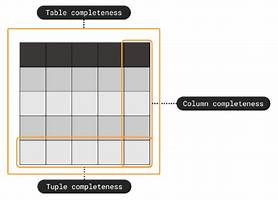




#### Column completeness

In [ ]:
valori_percentuale = []
valori_nulli = []
nomi = []
for i in df_personaggi:
  nulli = df_personaggi[i].isnull().sum()
  completezza = nulli/1209
  valori_percentuale.append(completezza)
  valori_nulli.append(nulli)
  nomi.append(i)
  #print(completezza)
#nomi
#valori_nulli
#valori_percentuale
zipped = list(zip(nomi, valori_nulli, valori_percentuale))
df = pd.DataFrame(zipped, columns=['Nome_colonna', 'Valori_nulli', 'Valori_nulli_%'])
df

,Nome_colonna,Valori_nulli,Valori_nulli_%
0,Character,0,0.000000
1,Birth Month,643,0.531844
2,Birth Day,643,0.531844
3,Age,829,0.685691
4,deceased,1031,0.852771
5,Birth_sea,849,0.702233
6,Birt_Island,1025,0.847808
7,Hometown,1098,0.908189
8,Blood Type,835,0.690653
9,Height in Meters,816,0.674938


#### Tuple completeness


In [ ]:
len_columns = len(df_personaggi.columns)
valori_percentuale_row = []
valori_nulli_row = []
nomi_row = []
for i in df_personaggi.index:
    row = df_personaggi.loc[i]
    nulli = row.isna().sum()
    completezza = nulli/1209
    valori_percentuale_row.append(completezza)
    valori_nulli_row.append(nulli)
    nomi_row.append(i)

zipped = list(zip(nomi_row, valori_nulli_row, valori_percentuale_row))
df_row = pd.DataFrame(zipped, columns=['Nome_riga', 'valori_nulli_row', 'valori_percentuale_row_%'])
df_row



,Nome_riga,valori_nulli_row,valori_percentuale_row_%
0,0,20,0.016543
1,1,21,0.017370
2,2,8,0.006617
3,3,22,0.018197
4,4,22,0.018197
...,...,...,...
1204,1204,14,0.011580
1205,1205,22,0.018197
1206,1206,21,0.017370
1207,1207,22,0.018197


### Accuracy 

This dimension is the level by which the data represent the reality of the domain of
reference.

A reference table consisting of a dataset downloaded from the
Kaggle platform at the following [link](https://onepiece.fandom.com/wiki/List_of_Canon_Characters).

It contains information that has been validated, checked and consequently reliable.


In [ ]:
y_pred = df_personaggi['Character']
y_true = personaggi['Character']

print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred,normalize = False))

1.0
1209


#### Create string null
In the compilation of **Neo4j** we encountered problems with the NAN values, consequently deciding to replace it with a 'null' string

In [ ]:
#df_personaggi.fillna('', inplace=True)
df_personaggi_nonull = df_personaggi.fillna('null')
#Cambio i nomi delle colonne se no su neo 4j da problemi
df_personaggi_nonull.rename(columns = {'Birth Month':'Birth_Month','Birth Day':'Birth_Day','Blood Type':'Blood_Type','Height in Meters':'Height_in_Meters','Height in Foot':'Height_in_Foot','Devil Fruit':'Devil_Fruit','Armament Haki':'Armament_Haki','Observation Haki':'Observation_Haki','Conquerors Haki':'Conquerors_Haki','Bounty (USD)':'Bounty_USD','Bounty (EUR)':'Bounty_EUR'}, inplace = True)
#df_personaggi_nonull.to_csv('Personaggi_neo4j')


# Anime

In [8]:
episodi = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/Episodi%26Rating.csv')
episodi = episodi.drop('Unnamed: 0', axis=1)
episodi = episodi.drop('season', axis=1)
episodi.rename(columns = {'name':'Title_episode', 'rank':'rank_episode','trend':'trend_episode'}, inplace = True)
episodi.head()
#episodi.to_csv('Anime_neo4j')

,rank_episode,trend_episode,episode,Title_episode,start,total_votes,average_rating
0,"24,129",18,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,"32,043",7,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,"28,818",8,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,"37,113",4,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5


#Saghe

In [ ]:
import pandas as pd
saghe = pd.read_csv('https://github.com/SimoneFarallo/Data-Managment/raw/main/sagheepisodi')
saghe = saghe.drop('web-scraper-order',axis= 1)
saghe = saghe.drop('web-scraper-start-url',axis= 1)
saghe = saghe.drop('Total Minutes (avg 24)',axis= 1)
saghe.sort_values(by=['Saga N*'], inplace=True)
saghe = saghe.rename(columns = {'Arco narrativo':'Arco_narrativo','Start on Chapter':'Start_on_Chapter','Total Chapters':'Total_Chapters','Total Pages':'Total_Pages','Manga %':'Manga_perc','Start on Episode':'Start_on_Episode','Total Episodes':'Total_Episodes','Anime %':'Anime_perc'})
print(len(saghe))
saghe

49


,Saga N*,Arco_narrativo,Start_on_Chapter,Total_Chapters,Total_Pages,Manga_perc,Start_on_Episode,Total_Episodes,Anime_perc
2,1.0,Romance Dawn Arc,1,7,178,0.9%,1,3,0.3%
20,2.0,Orange Town Arc,8,14,273,1.4%,4,5,0.5%
23,3.0,Syrup Village Arc,22,20,396,2.0%,9,10,1.0%
26,4.0,Baratie Arc,42,27,514,2.7%,19,12,1.2%
17,5.0,Arlong Park Arc,69,27,514,2.7%,31,15,1.5%
6,5.1,Buggy Side Story Arc,0,0,0,0.0%,46,2,0.2%
28,6.0,Loguetown Arc,96,5,100,0.5%,48,6,0.6%
1,6.1,Warship Island Arc,0,0,0,0.0%,54,8,0.8%
8,7.0,Reverse Mountain Arc,101,5,96,0.5%,62,2,0.2%
45,8.0,Whiskey Peak Arc,106,9,169,0.9%,64,4,0.4%


In [ ]:
saghe.to_csv('Saghe_neo4j')

# Manga & Foreshadows


In [9]:
manga = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/capitolimanga.csv')
manga= manga[['indice','Title','Release Date','Pages']]
manga.rename(columns = {'indice':'number_chapter', 'Title':'Title_chapter','Release Date':'release_date_chapter', 'Pages':'page_chapter'}, inplace = True)
manga = manga.sort_values(by=['number_chapter'])
manga
#manga.to_csv('Manga_neo4j')

,number_chapter,Title_chapter,release_date_chapter,page_chapter
209,1,Romance Dawn - The Dawn of the Adventure,"July 19, 1997",53
531,2,"That Guy, ""Straw Hat Luffy""","July 28, 1997",23
1025,3,"Introducing ""Pirate Hunter Zoro""","August 4, 1997",21
39,4,"Marine Captain ""Axe-Hand Morgan""","August 11, 1997",19
848,5,Pirate King and Master Swordsman,"August 25, 1997",19
...,...,...,...,...
954,1045,Next Level,"April 4, 2022",19
349,1046,Raizo,"April 11, 2022",17
2,1047,The Sky Over the Capital,"April 25, 2022",19
1005,1048,Twenty Years,"May 9, 2022",17


In [10]:
foreshadows = pd.read_csv('https://github.com/SimoneFarallo/One_Piece_Neo4j_Graph/raw/main/df_screaped/foreshadow')
foreshadows = foreshadows.drop('web-scraper-order', axis=1)
foreshadows = foreshadows.drop('web-scraper-start-url', axis=1)
foreshadows = foreshadows.rename(columns={'scan manga':'scan_manga','scan manga rivelato':'scan_manga_rivelato','Chapters Later':'Chapters_Later','Days Later':'Days_Later','Years Later':'Years_Later'})
foreshadows
#foreshadows.to_csv('Foreshadows_neo4j')

,scan_manga,Setup,scan_manga_rivelato,Payoff,Chapters_Later,Days_Later,Years_Later
0,159,Ace gives Luffy a piece of paper,489,Vivre Cards are explained,330,"2,667",7.3
1,754,Kanjuro draws badly with his left hand,976,Kanjuro draws well when using his right hand,222,"2,079",5.7
2,555,Ace reveals having learned how to make a kasa ...,912,Tama reveals having met Ace in Wano,357,"3,248",8.9
3,5,Koushirou uses two crossed swords as a symbol ...,942,A Wano Samurai from 25 years ago appears using...,937,"7,931",21.7
4,154,There was no snow on the day Ace visited Drum ...,NaN,Ben Beakman reveals that melted because Ace wa...,NaN,"6,454",17.7
...,...,...,...,...,...,...,...
56,69,Arlong is introduced showing a sun tattoo,620,Sun Pirates where introduced,551,"4,496",12.3
57,173,Sanji's Den Den Mushi has both spirals to the ...,598,Sanji has both eyebrows to the same side,425,"3,500",9.6
58,808,Pleasures are introduced always smiling,943,Smiling is revealed to be a SMILE side effect,135,"1,274",3.5
59,501,Snakenecks appear in the Auctioning House pric...,827,Amande makes her debut,326,"2,919",8.0



#Mare, Frutti, Ciurme e Razze

**Sea**

In [ ]:
sea =df_personaggi[['Birth_sea']]
sea = sea.dropna()
sea = sea['Birth_sea'].unique()
sea = pd.DataFrame(sea)
#sea.to_csv('Sea_neo4j')

**Class Fruit**

In [ ]:
classe_frutti = frutti['Devil Fruit Class'].unique()
classe_frutti=pd.DataFrame(classe_frutti)
#classe_frutti.to_csv('class_fruit_neo4j')

**Ciurme**

In [ ]:
ciurme_neo4j = ciurme.groupby('Nome_ciurma').mean()
#ciurme_neo4j.to_csv('Ciurme_neo4j')

**Razza**

In [ ]:
razza = df_personaggi[['Race']]
razza = razza.groupby('Race').mean()
#razza.to_csv('Razze_neo4j')

# Bridge tables for neo4j

**Sagas & Episodes**

In [ ]:
#relazioni saga ed episodio
start_on_ep = saghe[['Arco_narrativo','Start_on_Episode']]
start_on_ep.rename(columns = {'Arco_narrativo':'name_saga','Start_on_Episode':'start_on_episode' }, inplace = True)
start_on_ep
#start_on_ep.to_csv('rel_saga_ep_neo4j')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name_saga,start_on_episode
2,Romance Dawn Arc,1
20,Orange Town Arc,4
23,Syrup Village Arc,9
26,Baratie Arc,19
17,Arlong Park Arc,31
6,Buggy Side Story Arc,46
28,Loguetown Arc,48
1,Warship Island Arc,54
8,Reverse Mountain Arc,62
45,Whiskey Peak Arc,64


**Sagas & Chapters**

In [ ]:
#relazioni saga e capitoli
start_on_chap = saghe[['Arco_narrativo','Start_on_Chapter']]
start_on_chap= start_on_chap.rename(columns={'Arco_narrativo':'name_saga', 'Start_on_Chapter': 'start_on_chapter'})
start_on_chap.drop(start_on_chap.loc[start_on_chap['start_on_chapter']== 0].index, inplace=True)
start_on_chap
#start_on_chap.to_csv('rel_saga_chap_neo4j')

,name_saga,start_on_chapter
2,Romance Dawn Arc,1
20,Orange Town Arc,8
23,Syrup Village Arc,22
26,Baratie Arc,42
17,Arlong Park Arc,69
28,Loguetown Arc,96
8,Reverse Mountain Arc,101
45,Whiskey Peak Arc,106
0,Little Garden Arc,115
46,Drum Island Arc,130


**Foreshadows & Manga**

In [ ]:
rel_foreshadows_scan = foreshadows[['scan_manga','Setup']]
#rel_foreshadows_scan.to_csv('rel_foreshadows_scan_neo4j')

In [ ]:
rel_foreshadows_scan_revelate = foreshadows[['scan_manga_rivelato','Payoff']]
rel_foreshadows_scan_revelate = rel_foreshadows_scan_revelate[rel_foreshadows_scan_revelate['scan_manga_rivelato'].isnull() == False]
#rel_foreshadows_scan_revelate.to_csv('rel_foreshadows_scan_revelate_neo4j')

**Characters & Anime**

In [ ]:
rel_character_ep = df_personaggi[['Character','first_appearance_episode']]
rel_character_ep.dropna(inplace=True)
rel_character_ep.info()
rel_character_ep['first_appearance_episode']= rel_character_ep['first_appearance_episode'].astype(int)
#rel_character_ep.to_csv('rel_character_ep_neo4j')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1208
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Character                 1209 non-null   object 
 1   first_appearance_episode  1209 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Characters & Manga**

In [ ]:
rel_character_manga = df_personaggi[['Character','first_appearance_chapter']]
#Eliminiamo i personaggi che compaiono nel capitolo 0, poichè è un errore, significa che non si sa dove sia nato il personaggio
rel_character_manga.drop(rel_character_manga.loc[rel_character_manga['first_appearance_chapter']== 0].index, inplace=True)
rel_character_manga.dropna(inplace=True)
#Cambiamo in int per avere lo stesso formato degli episodi
rel_character_manga['first_appearance_chapter']= rel_character_manga['first_appearance_chapter'].astype(int)
#rel_character_manga.to_csv('rel_character_manga_neo4j')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

**Characters & Crews**

In [ ]:
rel_character_crew = df_personaggi[['Character','Nome_ciurma']]
rel_character_crew.dropna(inplace=True)
#rel_character_crew.to_csv('rel_character_crew_neo4j')
rel_character_crew

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Character,Nome_ciurma
1,Abdullah,Pirati di Ideo
2,Absalom,Pirati di Thriller Bark
5,Aggie 68,Pirati di Barbabianca (sciolti)
11,Ahiru,Armata rivoluzionaria
13,Akehende,Marina
...,...,...
1187,Yomo,Abitanti di Zo
1195,Yui,Pirati di Roger (sciolti)
1203,Zepo,Abitanti di Zo
1204,Zeus,Pirati di Cappello di paglia


**Characters & Sea**

In [ ]:
rel_character_sea = df_personaggi[['Character','Birth_sea' ]]
rel_character_sea.dropna(inplace=True)
#rel_character_sea.to_csv('rel_character_sea_neo4j')
rel_character_sea

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Character,Birth_sea
2,Absalom,West Blue
12,Aisa,Paradise
20,Alvida,East Blue
22,Amazon,Paradise
24,And,Grand Line
...,...,...
1199,Zala,Grand Line
1200,Zambai,Paradise
1202,Zeo,Grand Line
1204,Zeus,Grand Line


**Characters & Race**

In [ ]:
rel_charcater_race = df_personaggi[['Character','Race']]
rel_charcater_race.dropna(inplace=True)
#rel_charcater_race.to_csv('rel_charcater_race_neo4j')
rel_charcater_race

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Character,Race
2,Absalom,Human
12,Aisa,Shyandia
20,Alvida,Human
22,Amazon,Skypean
24,And,Human
...,...,...
1200,Zambai,Human
1201,Zeff,Human
1202,Zeo,Fishmen
1204,Zeus,Homie


**Fruit & Fruit Class**

In [ ]:
rel_fruit_class = df_personaggi[['Character','Devil Fruit Class']]
rel_fruit_class = rel_fruit_class.rename(columns = {'Devil Fruit Class': 'Devil_Fruit_Class'})
rel_fruit_class.dropna(inplace=True)
#rel_fruit_class.to_csv('rel_fruit_class_neo4j')
rel_fruit_class

,Character,Devil_Fruit_Class
2,Absalom,Paramecia
19,Alpacaman,SMILE
20,Alvida,Paramecia
43,Azuki,SMILE (Failed)
44,Babanuki,SMILE
...,...,...
1162,Wapol,Paramecia
1169,Who's-Who,Zoan (Ancient)
1175,X Drake,Zoan (Ancient)
1178,Yamato,Zoan (Mythical)
